#Import Libraries

Load the needed libraries for our analyses.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools


#Download Brain Data

In the last tutorial we learned where to look for a good publicly available brain (EEG) dataset. We manually downloaded it, uploaded it, formatted it, and inspected it. Here we move onto doing some descriptive qualitative and quantitative analyses to get ready for deep learning processing. To speed up the process, the following code blocks will automatically download the sample brain data we will use in this tutorial. The data will be downloaded directly into your drive and by the end of the tutorial the data will be deleted to not burden your Drive memory. The first code block below is commented out but contains links to the hosted sample data if you wish to manually access the data yourself.  

In [ ]:
##Links to Data##
#You can use the links to manually download and upload the data how you see fit.
#X_train data link:
#https://drive.google.com/file/d/13kVBl-WYJntN4izrXB8bOX6A8-J3bcMh/view?usp=share_link


#X_test data link:
#https://drive.google.com/file/d/1--KqF9hIrziLxFv_farD4QCmNdqjYUf0/view?usp=share_link

In [ ]:
#Automatically downloads shared data into your Drive
!wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=13kVBl-WYJntN4izrXB8bOX6A8-J3bcMh' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=13kVBl-WYJntN4izrXB8bOX6A8-J3bcMh" -O X_train.npy && rm -rf /tmp/cookies.txt
!wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1--KqF9hIrziLxFv_farD4QCmNdqjYUf0' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1--KqF9hIrziLxFv_farD4QCmNdqjYUf0" -O X_test.npy && rm -rf /tmp/cookies.txt


X_train.npy         100%[===================>]   1.40G   102MB/s    in 17s     
X_test.npy          100%[===================>] 715.26M   101MB/s    in 9.8s    


#Load Brain Data into Memory

Now that we have the sample data in our Drive, we will load it into memory. This loads the brain data set into a numpy format seperated into Train/Val/Test sets for ease of use. The print statements output the shape of the data which is described as (numbers of examples, width, height, depth). Here the width refers to the number of samples (time) in the signal and height refers to the number of recording channels.

In [ ]:
path = "/content/"

X_train = np.load(path + 'X_train.npy')
print(X_train.shape)
X_test = np.load(path + 'X_test.npy')
print(X_test.shape)

(12000, 125, 125, 1)
(6000, 125, 125, 1)
(6000, 125, 125, 1)


#Visually Inspect Data

Now that we have our data we should visually inspect it. Apart from this being good practice and making sure that your data looks like brain data, we also want to look at the qualia of the data. In other words, this step is useful in getting a visual understanding of the properties of your data and what you might be able to do with it.  

Text(0.5, 0, 'Samples')

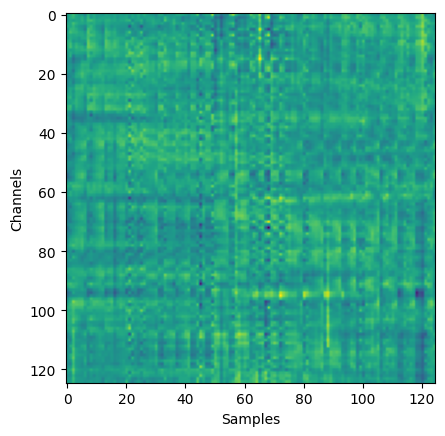

In [ ]:
sample = np.squeeze(X_train[10]) #picks the 10th example from the training data to inspect, change the number to inspect other examples

plt.imshow(sample)
plt.ylabel('Channels')
plt.xlabel('Samples')

#Generate Target Labels

In supervised learning, every data we have like images, sound, or text needs to have a corresponding label. These labels are what are used to train the models based on some categorization. That is to say, that we need to know what examples in our data can be considered as one class or another. Here we create labels of our data to separate the brain data either by which song it corresponds to or which person it came from. In classification models, these labels are the target and what the model tries it's best to learn when it predicts. Given some brain data as input, the model will output a label as a prediction. This means that it's prediction is trying to categorize the input as belonging to some class such as which song it corresponds to or which person it came from.

In [ ]:
#This code block creates the proper target labels for the model classification
#These targets are used to divide the brain data examples into the 5 different songs
participants = 20
samples = 15
songs = 5
train_chunks = 8
val_chunks = 4
test_chunks = 4

song_label_train = [0,1,2,3,4]
song_label_train = np.concatenate([song_label_train]*train_chunks)
song_label_train = list(itertools.chain.from_iterable(itertools.repeat(x, participants*samples) for x in song_label_train))
song_label_train = np.array(song_label_train)
print(song_label_train.shape)

song_label_test = [0,1,2,3,4]
song_label_test = np.concatenate([song_label_test]*test_chunks)
song_label_test = list(itertools.chain.from_iterable(itertools.repeat(x, participants*samples) for x in song_label_test))
song_label_test = np.array(song_label_test)
print(song_label_test.shape)

(12000,)
(6000,)
(6000,)


In [ ]:
#exands the target labels to match the model inference being at 1 second at a time
chans = 125
song_label_train = list(itertools.chain.from_iterable(itertools.repeat(x, chans) for x in song_label_train))
song_label_train = np.array(song_label_train)
print(song_label_train.shape)

song_label_test = list(itertools.chain.from_iterable(itertools.repeat(x, chans) for x in song_label_test))
song_label_test = np.array(song_label_test)
print(song_label_test.shape)

(1500000,)
(750000,)


In [ ]:
#These targets are used to divide the brain data examples into the 20 different participants
songs = 5

person_id_train = list(range(0,20))
person_id_train = np.concatenate([person_id_train]*train_chunks)
person_id_train = list(itertools.chain.from_iterable(itertools.repeat(x, songs*samples) for x in person_id_train))
person_id_train = np.array(person_id_train)
print(person_id_train.shape)

person_id_test = list(range(0,20))
person_id_test = np.concatenate([person_id_test]*test_chunks)
person_id_test = list(itertools.chain.from_iterable(itertools.repeat(x, songs*samples) for x in person_id_test))
person_id_test = np.array(person_id_test)
print(person_id_test.shape)

(12000,)
(6000,)
(6000,)


In [ ]:
#exands the target labels to match the model inference being at 1 second at a time
person_id_train = list(itertools.chain.from_iterable(itertools.repeat(x, chans) for x in person_id_train))
person_id_train = np.array(person_id_train)
print(person_id_train.shape)

person_id_test = list(itertools.chain.from_iterable(itertools.repeat(x, chans) for x in person_id_test))
person_id_test = np.array(person_id_test)
print(person_id_test.shape)

(1500000,)
(750000,)


#Explore Feature Extraction

In traditional Machine Learning practices it is standard procedure to take complex data and identify key features to extract for model training. Here we will do the same in a simple explorative way, to have a better understanding of our data and how it can be modeled.  

Here let's start by looking at 1 second of brain activity for a specific channel. Electroencephalogram (EEG) measures brain data via multiple channels. Here our dataset has 125 channels per any given person's head. The code cell below picks a specific channel for us to inspect and perform feature extraction on.

Text(0.5, 0, 'Samples')

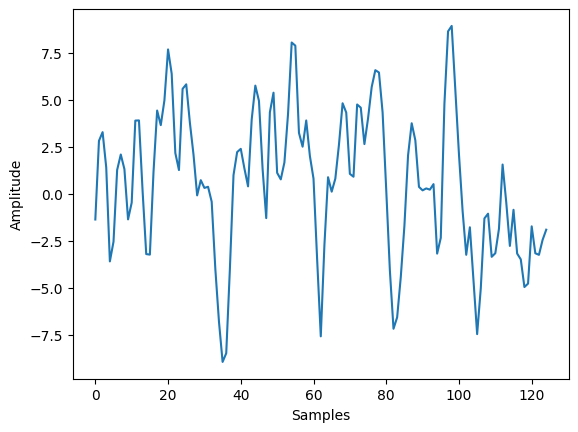

In [ ]:
sample_channel = sample[:,5] #picks the 5th channel from our example to inspect, change the number to inspect other data channels

plt.plot(sample_channel)
plt.ylabel('Amplitude')
plt.xlabel('Samples')

Let's start by taking the Hilbert envelope of our selected recording channel. This is a common signal processing step when dealing with timeseries from electrical activity such as seismic quakes, music, and brain data. The Hilbert envelope gives us the amplitude of the analytical signal as calculated by the Hilbert transform. Simply put, it gives us an average of the signal's amplitude over time. This is often used to make the signal easier to process in machine learning and for simple denoising.   

Text(0.5, 0, 'Samples')

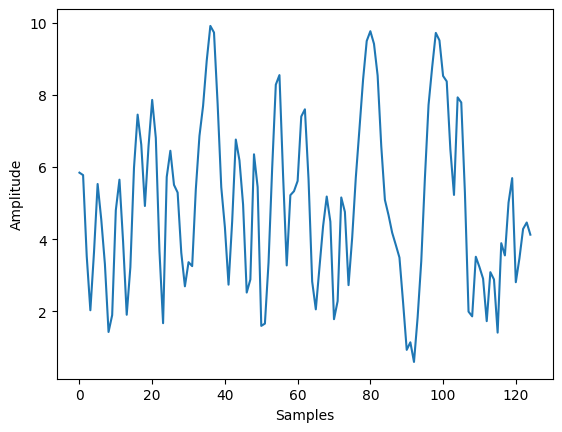

In [ ]:
from scipy.signal import hilbert

sample_env = np.abs(hilbert(sample_channel))

plt.plot(sample_env)
plt.ylabel('Amplitude')
plt.xlabel('Samples')

Next lets get a copy of our dataset transformed into Hilber envelopes.

In [ ]:
#takes about 3 mins to run
envs_train = []

for i in range(len(X_train)):
  x = X_train[i]
  for j in range(len(x)):
    chan = x[:,j]
    chan_env = np.abs(hilbert(chan))

    envs_train.append(chan_env)

envs_train = np.array(envs_train)
envs_train.shape

(1500000, 125, 1)

In [ ]:
envs_test = []

for i in range(len(X_test)):
  x = X_test[i]
  for j in range(len(x)):
    chan = x[:,j]
    chan_env = np.abs(hilbert(chan))

    envs_test.append(chan_env)

envs_test = np.array(envs_test)
envs_test.shape

(750000, 125, 1)

Simpler machine learning models cannot handle complex data and need for a signal to be reduced to a single but informative number. In the next code cell we get a single informative number by taking the Root Mean Square of a recording channel. This metric is the approximated power dissipation of a time varying function. In other words, it is an average power metric for the electrical current of interest e.g., brain signals.

In [ ]:
#Root Mean Square is the approximated power dissipation of a time varying function

rms = np.sqrt(np.mean(sample_env**2))

rms

5.461861088134365

In [ ]:
#Takes the RMS of all of your training data and returns an RMS copy of your data
rms_train = []

for i in range(len(envs_train)):
  rms = np.sqrt(np.mean(envs_train[i]**2))

  rms_train.append(rms)

rms_train = np.array(rms_train)
rms_train.shape

(1500000,)

In [ ]:
rms_train = np.reshape(rms_train, (1500000,1))
print(rms_train.shape)

(1500000, 1)


In [ ]:
#Takes the RMS of all of your testing data and returns an RMS copy of your data
rms_test = []

for i in range(len(envs_test)):
  rms = np.sqrt(np.mean(envs_test[i]**2))

  rms_test.append(rms)

rms_test = np.array(rms_test)
rms_test.shape

(750000,)

In [ ]:
rms_test = np.reshape(rms_test, (750000,1))
print(rms_test.shape)

(750000, 1)


Now lets take the RMS of every recording channel from our 1 second brain activity sample. The plot below shows what the distribution of values looks like.

Text(0.5, 0, 'RMS Values')

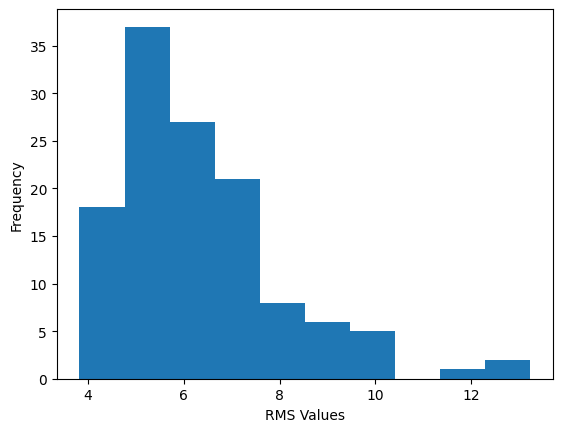

In [ ]:
rms_list = []
x = list(range(0,125))

for i in range(len(sample)):
  sample_channel = sample[:,i]
  sample_env = np.abs(hilbert(sample_channel))
  rms = np.sqrt(np.mean(sample_env**2))
  rms_list.append(rms)

plt.hist(rms_list)
plt.ylabel('Frequency')
plt.xlabel('RMS Values')

Next, lets explore feature extraction that is commonly related to complex auditory signals such as music. First we have a way of getting the Mel-Frequency Cepstrum Coefficients, which outputs an 1-dimensional array. This is a function that approximates the short-term power spectrum of a sound to a mel scale. You can think of this as a second order frequeny measure like going from a first order speed to a second order velocity measurement. Mel scale refers to transforming the signal to how sound is perceived by humans where certain frequencies have stronger representation than others in what we think is an audible and perceptible signal.

In [ ]:
import librosa
sr = 125

mfcc = librosa.feature.mfcc(y=sample_channel, sr=sr,n_fft=16, n_mels=10)

mfcc

array([[24.51754976],
       [ 8.38173277],
       [-1.39280205],
       [-3.02294113],
       [ 2.37887464],
       [-0.18935685],
       [ 0.48049511],
       [ 0.96299035],
       [-0.95360126],
       [-0.68804797]])

Text(0.5, 0, 'Coefficients')

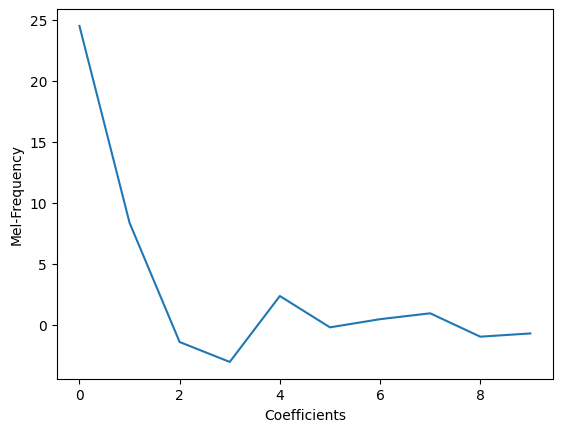

In [ ]:
plt.plot(mfcc)
plt.ylabel('Mel-Frequency')
plt.xlabel('Coefficients')

Next we can visualize the coefficients above as power shown in decibels.

Text(0.5, 0, 'Coefficients')

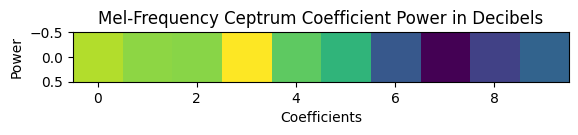

In [ ]:
sr = 125
S = librosa.feature.melspectrogram(y=sample_channel, sr=sr,n_fft=16, n_mels=10)

S_dB = librosa.power_to_db(S, ref=np.max)
S_dB = np.reshape(S_dB, (S_dB.shape[1],S_dB.shape[0]))

plt.imshow(S_dB)
plt.title("Mel-Frequency Ceptrum Coefficient Power in Decibels")
plt.ylabel('Power')
plt.xlabel('Coefficients')

#Load MFCC Data

We saw how we could transform brain data into a representation that is interpretable from an auditory analysis perspective. The code below allows you to download the brain data sets we have transformed into Mel-Frequency Cepstrum Coefficients. This helps save time of having to run the computation yourself. If you would like to do this yourself, you can skip this section and move to the optional section below.

In [ ]:
##Links to Data##
#You can use the links to manually download and upload the data how you see fit.
#mfcc_train data link:
#"https://drive.google.com/file/d/1Kcsj093juaDqGS_owhJKzRsjas6HmtUS/view?usp=sharing"
#mfcc_test data link:
#"https://drive.google.com/file/d/1BJ9z_7tg67BwZbl_W5Vx4scgiVRWX6Bl/view?usp=share_link"

In [ ]:
#Automatically Downloads the data
!wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Kcsj093juaDqGS_owhJKzRsjas6HmtUS' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Kcsj093juaDqGS_owhJKzRsjas6HmtUS" -O mfcc_train.npy && rm -rf /tmp/cookies.txt
!wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1BJ9z_7tg67BwZbl_W5Vx4scgiVRWX6Bl' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1BJ9z_7tg67BwZbl_W5Vx4scgiVRWX6Bl" -O mfcc_test.npy && rm -rf /tmp/cookies.txt

mfcc_train.npy      100%[===================>] 114.44M  99.6MB/s    in 1.1s    
mfcc_test.npy       100%[===================>]  57.22M   115MB/s    in 0.5s    


In [ ]:
path = "/content/"

mfcc_train = np.load(path + 'mfcc_train.npy')
print(mfcc_train.shape)

mfcc_test = np.load(path + 'mfcc_test.npy')
print(mfcc_test.shape)

(1500000, 10)
(750000, 10)


#(OPTIONAL) Transform Brain Data to Mel Cepstrum Coefficients

Here is the code used to transform the training and test brain data into Mel-Frequency Cepstrum Coefficients. You can play around with this code to see how the data is changed through different parameter values.

In [ ]:
#takes about 12 minutes to run
mfcc_train = []

for i in range(len(X_train)):
  x = X_train[i]
  for j in range(len(x)):
    chan = x[:,j]
    chan_mfcc = librosa.feature.mfcc(y=np.squeeze(chan), sr=sr,n_fft=16, n_mels=10)

    mfcc_train.append(chan_mfcc)

mfcc_train = np.array(mfcc_train)
print(mfcc_train.shape)

(1500000, 10, 1)


In [ ]:
mfcc_test = []

for i in range(len(X_test)):
  x = X_test[i]
  for j in range(len(x)):
    chan = x[:,j]
    chan_mfcc = librosa.feature.mfcc(y=np.squeeze(chan), sr=sr,n_fft=16, n_mels=10)

    mfcc_test.append(chan_mfcc)

mfcc_test = np.array(mfcc_test)
print(mfcc_test.shape)

(750000, 10, 1)


In [ ]:
mfcc_train = np.squeeze(mfcc_train)
mfcc_test = np.squeeze(mfcc_test)

#1 Dimensional Modeling

In our last section we will try some simple machine learning modeling. The goal is to get an initial idea of what simpler and traditional methods can do for us.

Traditional machine learning usually depends on researchers performing feature extraction before hand. This makes it easier for models to compute as we shrink the dimensionality of the data and identify salient features that we care about. In the section before we explored several analyses that do this by denoising the signal, reducing dimensionality, and measuring frequency components.

First lets start by exploring univariate model training. For this we will use Root Mean Square values as our predictor to the song name target classes with a simple Logistic Regression model for classification.

In [ ]:
#univariate
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

#Takes about 5 mins without GPU

lm = linear_model.LogisticRegression(multi_class='ovr', solver='lbfgs')
lm.fit(rms_train, song_label_train)

lm.score(rms_test, song_label_test)

0.21343466666666666

Running the univariate predictor using an RMS score per recording channel to predict what song someone is listening to via a Logistic Regression model gives us poor performance. Random chance for classification is 20% and the model validation shows 21.34%, which is at least better than random chance but not a desireable result.

Next let's try doing the same modeling analysis but instead of trying to predict the song names lets try to predict which person's brain the data comes from.

In [ ]:
#Takes about 5 mins without GPU

lm = linear_model.LogisticRegression(multi_class='ovr', solver='saga')
lm.fit(rms_train, person_id_train)

lm.score(rms_test, person_id_test)

0.06402933333333333

Again we see poor performance, where random chance is 5% but our model validation performance is 6.4%. The good news is that the model is at least trying to learn but it simply can't do it well. This could be for several reasons, but the most obvious one is that boiling down a complex signal like brain data to 1 number erases too much information.

Next lets try classifying our data using vector arrays. Here we will use the Mel-Frequency Cepstral Coefficients as predictors and the same Logistic Regression models. Let's see if having more than 1 number but still not modeling it as a 2 dimensional representation can give better results.

In [ ]:
#can take about 10 mins to run
lm = linear_model.LogisticRegression(multi_class='ovr', solver='lbfgs')
lm.fit(mfcc_train, song_label_train)

lm.score(mfcc_test, song_label_test)

0.208608

In [ ]:
#can take 10 mins to run
lm = linear_model.LogisticRegression(multi_class='ovr', solver='saga')
lm.fit(mfcc_train, person_id_train)

lm.score(mfcc_test, person_id_test)

0.06412133333333334

In [ ]:
envs_train = np.squeeze(envs_train)
envs_test = np.squeeze(envs_test)

In [ ]:
envs_train = np.expand_dims(envs_train,axis=2)
envs_test = np.expand_dims(envs_test,axis=2)

# 1-Dimensional Deep Learning

We saw that it was difficult to train simple/standard machine learning models with features from brain data. Next, lets try leveraging the power of simple deep learning. The strength of deep learning is that it allows the model to learn more on its own. This means that it usually requires less feature extraction. Therefore, lets test a simple deep learning approach using the Hilbert Envelope from the brain data, as it still holds more of the original signal's dimensionality.

In [ ]:
#sets the unused datasets as empty lists to save memory space
mfcc_train = []
mfcc_test = []
X_train = []
X_test = []

In [ ]:
#Turns the target labels into a categorical vector representation for doing multi-class classification
from tensorflow.keras.utils import to_categorical

song_label_train = to_categorical(song_label_train, num_classes=5)
song_label_test = to_categorical(song_label_test, num_classes=5)

The model architecture we will be using is a simple 1-dimensional Convolutional Network.

In [ ]:
#Uses Keras to define a sequential model, adding layer by layer
import keras
from keras.models import Sequential
from tensorflow.keras import layers

my_act = "relu"
model1 = Sequential()
in_shape = (envs_train.shape[1],envs_train.shape[2])

model1.add(layers.Conv1D(kernel_size=(9),filters=32,activation=my_act,input_shape=in_shape))
model1.add(layers.Dropout(.4))
model1.add(layers.Conv1D(kernel_size=(6),filters=64,activation=my_act))
model1.add(layers.Conv1D(kernel_size=(3),filters=16,activation=my_act))
model1.add(layers.GlobalAveragePooling1D(data_format='channels_last') )

model1.add(layers.Dense(5,activation="softmax"))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 117, 32)           320       
                                                                 
 dropout_3 (Dropout)         (None, 117, 32)           0         
                                                                 
 conv1d_7 (Conv1D)           (None, 112, 64)           12352     
                                                                 
 conv1d_8 (Conv1D)           (None, 110, 16)           3088      
                                                                 
 global_average_pooling1d_3   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_3 (Dense)             (None, 5)                 85        
                                                      

In [ ]:
#Sets the training parameters and begins the training procedure
batches = 1000
opt = keras.optimizers.Adam(learning_rate=0.0035)
model1.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['categorical_accuracy'])
history = model1.fit(envs_train,song_label_train,epochs=25,batch_size=batches,validation_data=(envs_test,song_label_test), shuffle=True)

Epoch 1/25
1500/1500 [==============================] - 26s 16ms/step - loss: 1.6086 - categorical_accuracy: 0.2100 - val_loss: 1.6089 - val_categorical_accuracy: 0.2101
Epoch 2/25
1500/1500 [==============================] - 22s 15ms/step - loss: 1.6070 - categorical_accuracy: 0.2141 - val_loss: 1.6074 - val_categorical_accuracy: 0.2117
Epoch 3/25
1500/1500 [==============================] - 22s 15ms/step - loss: 1.6056 - categorical_accuracy: 0.2164 - val_loss: 1.6044 - val_categorical_accuracy: 0.2176
Epoch 4/25
1500/1500 [==============================] - 24s 16ms/step - loss: 1.6036 - categorical_accuracy: 0.2196 - val_loss: 1.6038 - val_categorical_accuracy: 0.2191
Epoch 5/25
1500/1500 [==============================] - 22s 15ms/step - loss: 1.6024 - categorical_accuracy: 0.2219 - val_loss: 1.6027 - val_categorical_accuracy: 0.2197
Epoch 6/25
1500/1500 [==============================] - 22s 15ms/step - loss: 1.6019 - categorical_accuracy: 0.2234 - val_loss: 1.6025 - val_categoric

The graph below shows the accuracy increase accross epochs of model training. We only trained it for 25 epochs as a demonstration. Typical deep learning requires training for hundreds to thousands of epochs. But even with 25 epochs we see that the training is starting to plateau. This means that we can expect performance to increase after hundreds of epochs but that the increase will not be much higher.

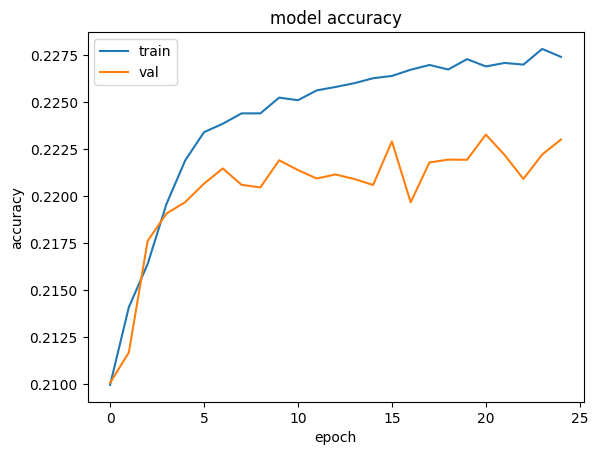

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

We see that deep learning has allowed for better performance but it was not a significant jump despite having a much larger model. In the next tutorial we will explore how to do deep learning with 2-Dimensional representations of brain data i.e., computer vision methods. Adding an extra dimension in the analysis will allow us for better learning and hopefully strong performance.

#Delete Data to Save Space

In [ ]:
#Deletes the files so as to not burden your personal Drive.
#These files can be downloaded and loaded back in by re-running this tutorial notebook

!rm X_train.npy
!rm X_test.npy

!rm mfcc_train.npy
!rm mfcc_test.npy